In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.tree import DecisionTreeClassifier, export_graphviz
from graphviz import Source
from IPython.display import SVG

In [3]:
data = pd.read_csv('lightning_data.tsv', sep='\t')

In [4]:
data.head(10)

,Unnamed: 0,Source,Left,Target,Right,Type,Subject,Order,Arg0_gram,Verb_fin,Verb_gram,Obj,Arg1,Arg1_gram,Arg1_anim,Has_arg2,Arg2,Arg2_gram,Direct_meaning,Fact
0,1.0,wsport.free.fr,"спрашивает: «Говорят, ты отравился?» Как будто",молнией меня ударило,. Откуда он мог это узнать?! Медленно повернулся,ins_acc,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",1,меня,acc,1,0,NaN,NaN,0,0
1,2.0,reaktivist.ru,херотень (за редким исключением). Какой,молнией её ударило,"доподлинно неизвестно, но пластинка 2014",ins_acc,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",1,её,acc,1,0,NaN,NaN,0,0
2,3.0,s37blog.ru,"например когда копали в запретной зоне),",молнией в него ударило,и т.п. Звоним оператору службы поддержки,ins_prep,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",0,в него,в+acc,1,0,NaN,NaN,1,1
3,4.0,heblit.bravepages.com,"его глазами, разинув рот, и вдруг будто",молнией меня ударило,. Ведь этот мальчишка похож чем-то на Игала,ins_acc,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",1,меня,acc,1,0,NaN,NaN,0,0
4,NaN,biografija.ru,гроз. 26 июля 1753 года Рихман был убит,"молнией, ударившей",в железный шест машины; Ломоносов в тот,nom_prep,1,молния ударить X,ins,0,"V,пе=прош,твор,ед,прич,полн,жен,сов,действ",0,в железный шест,в+acc,0,0,NaN,NaN,1,1
5,5.0,kartasnov.ru,"электронов, я чувствовал это, как будто",молнией в меня ударило,", неприятные ощущения. Не помню, что было",ins_prep,0,молния X ударить,ins,1,"V,пе=прош,ед,изъяв,сред,сов",0,в меня,в+acc,1,0,NaN,NaN,0,0
6,6.0,a-mud.ru,"Когда Вас ""страхует"" лекарь, скорее всего,",молнией Вас не ударит,. Вот когда лекаря нет... А теперь добавлю,ins_acc,0,молния X ударить,ins,1,"V,пе=непрош,ед,изъяв,3-л,сов",1,Вас,acc,1,0,NaN,NaN,1,0
7,NaN,blogotshelnika.ru,Бог разгневался и послал жестокую грозу с,"молнией, ударившей",в дерево и убившей всех игроков. Это и,nom_prep,1,молния X ударить,ins,0,"V,пе=прош,твор,ед,прич,полн,жен,сов,действ",0,в дерево,в+acc,0,0,NaN,NaN,1,1
8,7.0,reformed.org.ua,у неопалимой купины. Приведенный в ужас,"молнией, которая ударила","в землю неподалеку от него, Лютер поклялся",ins_prep,0,молния ударить X,ins,1,"V,пе=прош,ед,изъяв,жен,сов",0,в землю,в+acc,0,0,NaN,NaN,1,1
9,NaN,vlklit.ru,"со слов родни, что тогда их чуть не убило","молнией, ударившей","в соседнее дерево. С тараканами же, напротив",nom_prep,1,молния ударить X,ins,0,"V,пе=прош,твор,ед,прич,полн,жен,сов,действ",0,в соседнее дерево,в+acc,0,0,NaN,NaN,1,1


In [5]:
# выбираем столбцы, которые потребуются для предсказания
# кодируем категориальные признаки в бинарные
data_bin_subj = pd.concat((data['Subject'], 
                      pd.get_dummies(data['Order']), 
                      data['Arg1_anim'],
                      data['Verb_fin'], 
                      data['Obj'], 
                      data['Has_arg2'],
                    data['Direct_meaning'], 
                      data['Fact']), axis=1)

In [6]:
# корреляция Пирсона между признаками
data_bin_subj.corr()

,Subject,X молния ударить,X ударить молния,молния X ударить,молния ударить X,ударить X молния,ударить молния X,Arg1_anim,Verb_fin,Obj,Has_arg2,Direct_meaning,Fact
Subject,1.000000,-0.255503,-0.019984,-0.263616,0.300217,-0.037847,0.032724,-0.323959,-0.057338,-0.519340,0.052093,0.448588,0.295292
X молния ударить,-0.255503,1.000000,-0.150783,-0.076503,-0.215894,-0.056143,-0.021471,0.186396,0.070815,0.251974,-0.034179,-0.363733,-0.199670
X ударить молния,-0.019984,-0.150783,1.000000,-0.224414,-0.633305,-0.164690,-0.062983,0.283423,0.207731,0.036614,-0.100262,0.072254,0.032799
молния X ударить,-0.263616,-0.076503,-0.224414,1.000000,-0.321321,-0.083559,-0.031956,0.133870,0.053844,0.166534,-0.050870,-0.203919,-0.208243
молния ударить X,0.300217,-0.215894,-0.633305,-0.321321,1.000000,-0.235806,-0.090181,-0.329404,-0.140377,-0.177809,0.158315,0.203616,0.124957
ударить X молния,-0.037847,-0.056143,-0.164690,-0.083559,-0.235806,1.000000,-0.023451,-0.169171,-0.257327,-0.122093,-0.037332,0.010412,0.100443
ударить молния X,0.032724,-0.021471,-0.062983,-0.031956,-0.090181,-0.023451,1.000000,-0.079491,0.029580,-0.046693,-0.014277,0.029580,0.055163
Arg1_anim,-0.323959,0.186396,0.283423,0.133870,-0.329404,-0.169171,-0.079491,1.000000,0.198746,0.564642,0.179605,-0.340406,-0.424173
Verb_fin,-0.057338,0.070815,0.207731,0.053844,-0.140377,-0.257327,0.029580,0.198746,1.000000,0.114626,-0.058860,-0.097561,-0.181937
Obj,-0.519340,0.251974,0.036614,0.166534,-0.177809,-0.122093,-0.046693,0.564642,0.114626,1.000000,0.305764,-0.397254,-0.279633


In [48]:
data_bin_subj.corr().round(decimals=4).to_csv('corr.csv', sep='\t')

In [16]:
# добавляем информацию о форме глагола, выделяем целевую переменную и строим решающее дерево
# X_subj = pd.concat((data_bin_subj.drop(['Subject'], axis =1), pd.get_dummies(data['Verb_gram'])), axis=1)
X_subj = data_bin_subj.drop(['Subject'], axis =1)
y_subj = data_bin_subj['Subject']

In [17]:
for col in X_subj.columns:
    print(X_subj[col].value_counts())

0    214
1     11
Name: X молния ударить, dtype: int64
0    156
1     69
Name: X ударить молния, dtype: int64
0    202
1     23
Name: молния X ударить, dtype: int64
0    118
1    107
Name: молния ударить X, dtype: int64
0    212
1     13
Name: ударить X молния, dtype: int64
0    223
1      2
Name: ударить молния X, dtype: int64
0    132
1     93
Name: Arg1_anim, dtype: int64
1    205
0     20
Name: Verb_fin, dtype: int64
0    181
1     44
Name: Obj, dtype: int64
0    220
1      5
Name: Has_arg2, dtype: int64
1    205
0     20
Name: Direct_meaning, dtype: int64
1    168
0     57
Name: Fact, dtype: int64


In [18]:
dt = DecisionTreeClassifier()

In [19]:
dt.fit(X_subj, y_subj)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

In [20]:
y_pred = dt.predict(X_subj)

In [21]:
from sklearn.metrics import classification_report

In [22]:
print(classification_report(y_subj, y_pred))

             precision    recall  f1-score   support

          0       0.67      0.92      0.77        24
          1       0.99      0.95      0.97       201

avg / total       0.96      0.94      0.95       225



In [32]:
# реальное распределение
y_subj.value_counts()

1    201
0     24
Name: Subject, dtype: int64

In [39]:
# предсказанное распределение
pd.Series(y_pred).value_counts()

1    192
0     33
dtype: int64

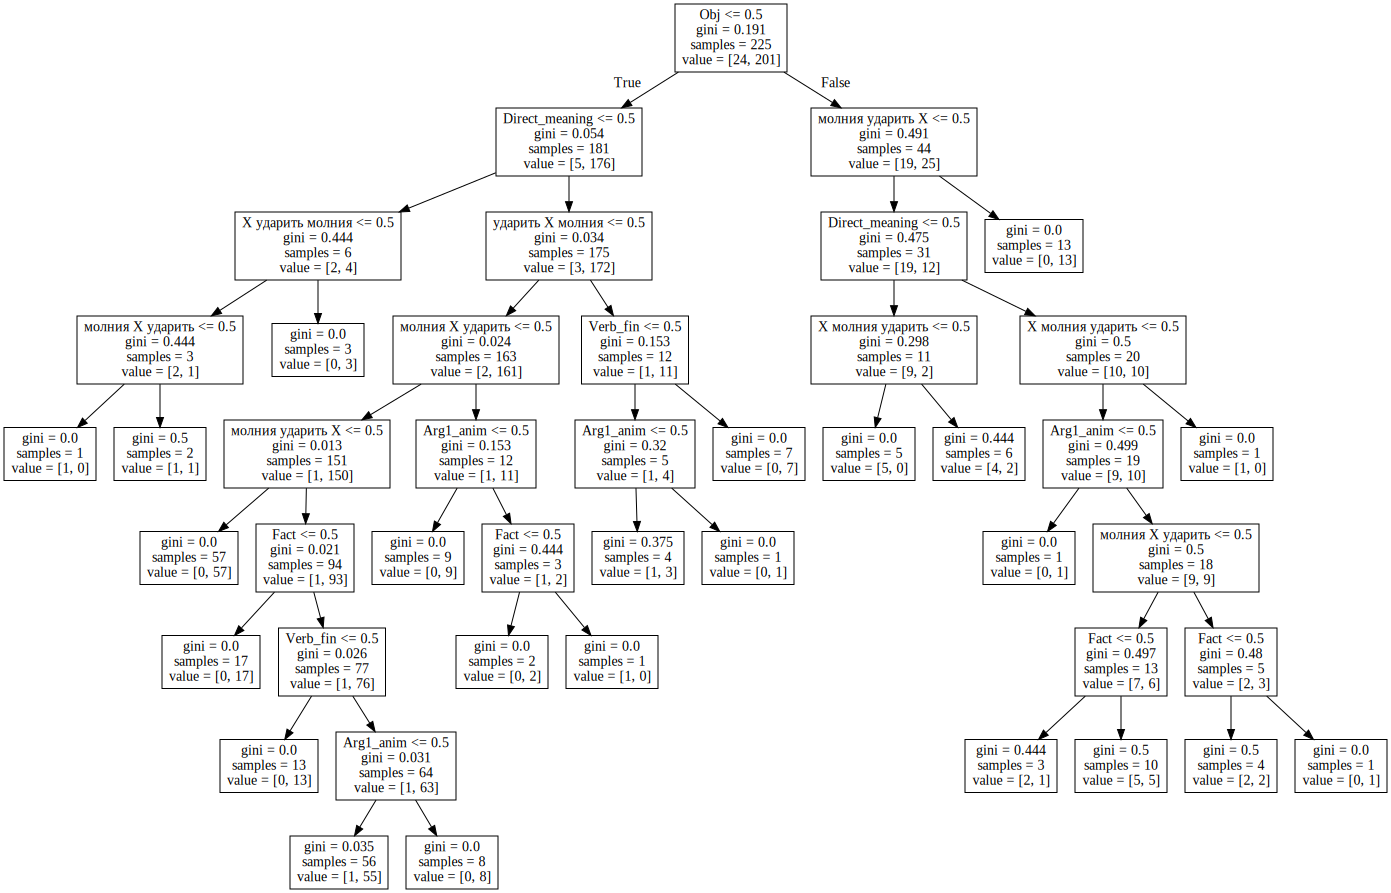

In [23]:
# посторенное дерево решений
graph = Source(export_graphviz(dt, out_file=None, feature_names=X_subj.columns))
SVG(graph.pipe(format='svg'))

In [27]:
# сохраняем картинку
graph = Source(export_graphviz(dt, out_file=None, feature_names=X_subj.columns))
png_bytes = graph.pipe(format='png')
with open('dtree_subject.png','wb') as f:
    f.write(png_bytes)

In [28]:
# посмотрим на веса признаков
importances = dt.feature_importances_
names = X_subj.columns

In [43]:
for i in sorted(zip(names, importances), key = lambda x: x[1], reverse =True):
    print(': '.join(map(str, i)))

Obj: 0.421850544636
молния ударить X: 0.25128884706
Direct_meaning: 0.0947229571271
Fact: 0.0680717588577
X ударить молния: 0.0486339082556
X молния ударить: 0.0413039172984
Arg1_anim: 0.0393259312891
молния X ударить: 0.0219810729968
Verb_fin: 0.00870337737228
ударить X молния: 0.00411768510695
ударить молния X: 0.0
Has_arg2: 0.0
